# EDA Propel

## 1. Simple data model

Proposed model:We have four tables. The first is the Organizations table, and we want an organization to be able to generate many campaigns. Therefore, our foreign key is Organization_ID in the Campaigns table, creating a one-to-many relationship. In turn, a campaign can contain many attendance records using the Campaign_ID foreign key in the Attendance table. Similarly, a participant can have multiple attendances using the Participant_ID foreign key in the Attendance table. Thus, the Attendance table would be the central table of the model, telling us who attended which campaign, which company, and the respective dates.

## 2.EDA

### Importing the necesary libraries and the file:

In [1]:
import pandas as pd

# Reading the file:
file = "data propel.xlsx"
df = pd.read_excel(file, sheet_name = 'Sheet1')

df.head()

,Organization_ID,Organization_Name,Organization_Type,Country,Campaign_ID,Campaign_Name,Campaign_Type,Campaign_Start_Date,Campaign_End_Date,Participant_ID,Participant_Name,Registered,Attended,Registration_Date,Attendance_Date,Engagement_Score,Segment
0,ORG011,Red Mujeres+,NGO,Argentina,CAM004,Nonprofit Tech Clinic,Training,2024-10-29 00:00:00,2024-11-04 00:00:00,P017,Ana Torres,True,no,2024-10-26 00:00:00,NaT,68.0,Youth
1,ORG007,Puentes Digitales,Social Enterprise,Mexico,CAM004,Women in Tech Talks,Tech Support,2024-02-19 00:00:00,2024-02-24 00:00:00,P177,Juan Méndez,False,False,NaN,NaT,58.0,Health
2,ORG001,Fundación Luz Verde,Social Enterprise,Peru,CAM013,AI for Social Impact,Tech Support,2024-11-21 00:00:00,2024-12-04 00:00:00,P187,Sofía Medina,False,False,2024-11-11 00:00:00,NaT,86.0,Health
3,ORG009,Fundación Luz Verde,Social Enterprise,Colombia,CAM011,STEAM Teachers Workshop,Fundraising,2024-02-03 00:00:00,2024-02-06 00:00:00,P162,Pedro Castillo,False,False,2024-01-27 00:00:00,NaT,74.0,Women Empowerment
4,ORG003,Jóvenes por el Clima,Community Org,Peru,CAM005,Climate Innovation Hub,Tech Support,NaN,2024-11-02 00:00:00,P198,Paola Jiménez,False,False,2024-11-01 00:00:00,NaT,88.0,Youth


In [2]:
# Just checking for any null values and the shape of the file and the data types:
df.info()
# There are some missing values, specially on the Dates columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Organization_ID      200 non-null    object        
 1   Organization_Name    200 non-null    object        
 2   Organization_Type    200 non-null    object        
 3   Country              200 non-null    object        
 4   Campaign_ID          200 non-null    object        
 5   Campaign_Name        200 non-null    object        
 6   Campaign_Type        200 non-null    object        
 7   Campaign_Start_Date  191 non-null    object        
 8   Campaign_End_Date    197 non-null    object        
 9   Participant_ID       200 non-null    object        
 10  Participant_Name     200 non-null    object        
 11  Registered           200 non-null    object        
 12  Attended             200 non-null    object        
 13  Registration_Date    195 non-null  

In [3]:
# Letś see the unique values on Country column:

df['Country'].unique()

array(['Argentina', 'Mexico', 'Peru', 'Colombia', 'Bolivia', 'Chile',
       'Costa Rica', 'Brazil', 'Ecuador', 'Guatemala', 'ARGENTINA',
       'GUATEMALA', 'Ecuador ', 'CHILE', 'Chile ', 'COLOMBIA', 'Peru ',
       'BOLIVIA', 'Guatemala '], dtype=object)

In [4]:
# We need to clean this before continuing:
df['Country'] = df['Country'].str.strip().str.capitalize()
df['Country'].unique()

array(['Argentina', 'Mexico', 'Peru', 'Colombia', 'Bolivia', 'Chile',
       'Costa rica', 'Brazil', 'Ecuador', 'Guatemala'], dtype=object)

In [5]:
# just Attendance_Date is on a date type:
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'], errors='coerce')
#df['Attendance_Date'] = pd.to_datetime(df['Attendance_Date'], errors='coerce')
df['Campaign_Start_Date'] = pd.to_datetime(df['Campaign_Start_Date'], errors='coerce')

# Now all of the columns with dates are in the propper data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Organization_ID      200 non-null    object        
 1   Organization_Name    200 non-null    object        
 2   Organization_Type    200 non-null    object        
 3   Country              200 non-null    object        
 4   Campaign_ID          200 non-null    object        
 5   Campaign_Name        200 non-null    object        
 6   Campaign_Type        200 non-null    object        
 7   Campaign_Start_Date  191 non-null    datetime64[ns]
 8   Campaign_End_Date    197 non-null    object        
 9   Participant_ID       200 non-null    object        
 10  Participant_Name     200 non-null    object        
 11  Registered           200 non-null    object        
 12  Attended             200 non-null    object        
 13  Registration_Date    195 non-null  

In [6]:
# To answer How many unique organizations or participants were active per month / per country?, letś first select the Dates where there are Attendance records:
df_active = df[df['Attendance_Date'].notna()].copy()

In [7]:
# Lets print some basic information/stats

print(f"Total records with attendance data: {len(df_active)} out of {len(df)}")
print(f"Participation rate: {len(df_active)/len(df)*100:.1f}%")



Total records with attendance data: 61 out of 200
Participation rate: 30.5%


In [8]:
# Letś now create a column with the month:
df_active['Attendance_Month'] = df_active['Attendance_Date'].dt.strftime('%B %Y')
df_active.head()

,Organization_ID,Organization_Name,Organization_Type,Country,Campaign_ID,Campaign_Name,Campaign_Type,Campaign_Start_Date,Campaign_End_Date,Participant_ID,Participant_Name,Registered,Attended,Registration_Date,Attendance_Date,Engagement_Score,Segment,Attendance_Month
5,ORG001,Tech por Todos,Foundation,Bolivia,CAM010,Nonprofit Tech Clinic,Webinar,2024-04-11,2024-04-13 00:00:00,P192,Sofía Medina,True,True,2024-04-06,2024-04-13,86.0,Women Empowerment,April 2024
10,ORG007,Tech por Todos,Community Org,Argentina,CAM018,Impact Measurement 101,Outreach,2024-04-07,2024-04-11 00:00:00,P112,Luis Pérez,True,True,2024-03-30,2024-04-11,NaN,Education,April 2024
21,ORG005,Fundación Luz Verde,Social Enterprise,Brazil,CAM005,Climate Innovation Hub,Outreach,2024-07-15,2024-07-26 00:00:00,P079,Pedro Castillo,True,True,2024-07-15,2024-07-16,41.0,Climate,July 2024
22,ORG005,EDU Impact,Community Org,Bolivia,CAM020,Community Fundraising Gala,Tech Support,2024-04-22,2024-04-26 00:00:00,P224,Andrés Gómez,True,True,2024-04-20,2024-04-25,77.0,Climate,April 2024
23,ORG001,Tech por Todos,Community Org,Brazil,CAM025,STEAM Teachers Workshop,Fundraising,2024-03-08,2024-07-08 00:00:00,P042,Andrés Gómez,True,True,2024-07-31,2024-08-08,55.0,Education,August 2024


In [9]:
# Creating a new dataframes:
#  grouped by Month and the unique Organization_ID
orgs_per_month = df_active.groupby('Attendance_Month')['Organization_ID'].nunique()
# And re index to order by month
orgs_per_month = orgs_per_month.reindex(pd.to_datetime(df_active['Attendance_Month'].unique()).strftime('%B %Y'))

# Lets take a look:
orgs_per_month.head()

/tmp/ipykernel_3132478/4120182757.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orgs_per_month = orgs_per_month.reindex(pd.to_datetime(df_active['Attendance_Month'].unique()).strftime('%B %Y'))


April 2024      6
July 2024       7
August 2024     2
March 2024      2
January 2024    3
Name: Organization_ID, dtype: int64

In [10]:
print("Organizations per Month:")
print("\n")
print(orgs_per_month)

Organizations per Month:


April 2024        6
July 2024         7
August 2024       2
March 2024        2
January 2024      3
May 2024          5
February 2024     5
October 2024      3
June 2024         4
November 2024     5
December 2024     3
September 2024    2
Name: Organization_ID, dtype: int64


In [11]:
# Now letś see uniqe Organizations per country:
orgs_per_country = df_active.groupby('Country')['Organization_ID'].nunique().sort_values(ascending=False)
print("\nActive Organizations by Country:")
print(orgs_per_country)


Active Organizations by Country:
Country
Guatemala     11
Colombia       6
Ecuador        5
Brazil         4
Costa rica     4
Mexico         4
Peru           4
Argentina      3
Bolivia        3
Chile          3
Name: Organization_ID, dtype: int64


In [12]:
# Letś do the same for participants:

participants_per_month = df_active.groupby('Attendance_Month')['Participant_ID'].nunique()
# Reordenar por fecha
participants_per_month = participants_per_month.reindex(pd.to_datetime(df_active['Attendance_Month'].unique()).strftime('%B %Y'))

print("\nActive Participants by Month:")
print(participants_per_month)



Active Participants by Month:
April 2024        6
July 2024         9
August 2024       5
March 2024        2
January 2024      4
May 2024          6
February 2024     6
October 2024      3
June 2024         5
November 2024     7
December 2024     3
September 2024    2
Name: Participant_ID, dtype: int64


/tmp/ipykernel_3132478/874171078.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  participants_per_month = participants_per_month.reindex(pd.to_datetime(df_active['Attendance_Month'].unique()).strftime('%B %Y'))


In [13]:
participants_per_country = df_active.groupby('Country')['Participant_ID'].nunique().sort_values(ascending=False)
print("\nActive Participants by Country:")
print(participants_per_country)



Active Participants by Country:
Country
Guatemala     13
Colombia       6
Costa rica     6
Ecuador        6
Brazil         5
Mexico         5
Peru           5
Argentina      4
Chile          4
Bolivia        3
Name: Participant_ID, dtype: int64


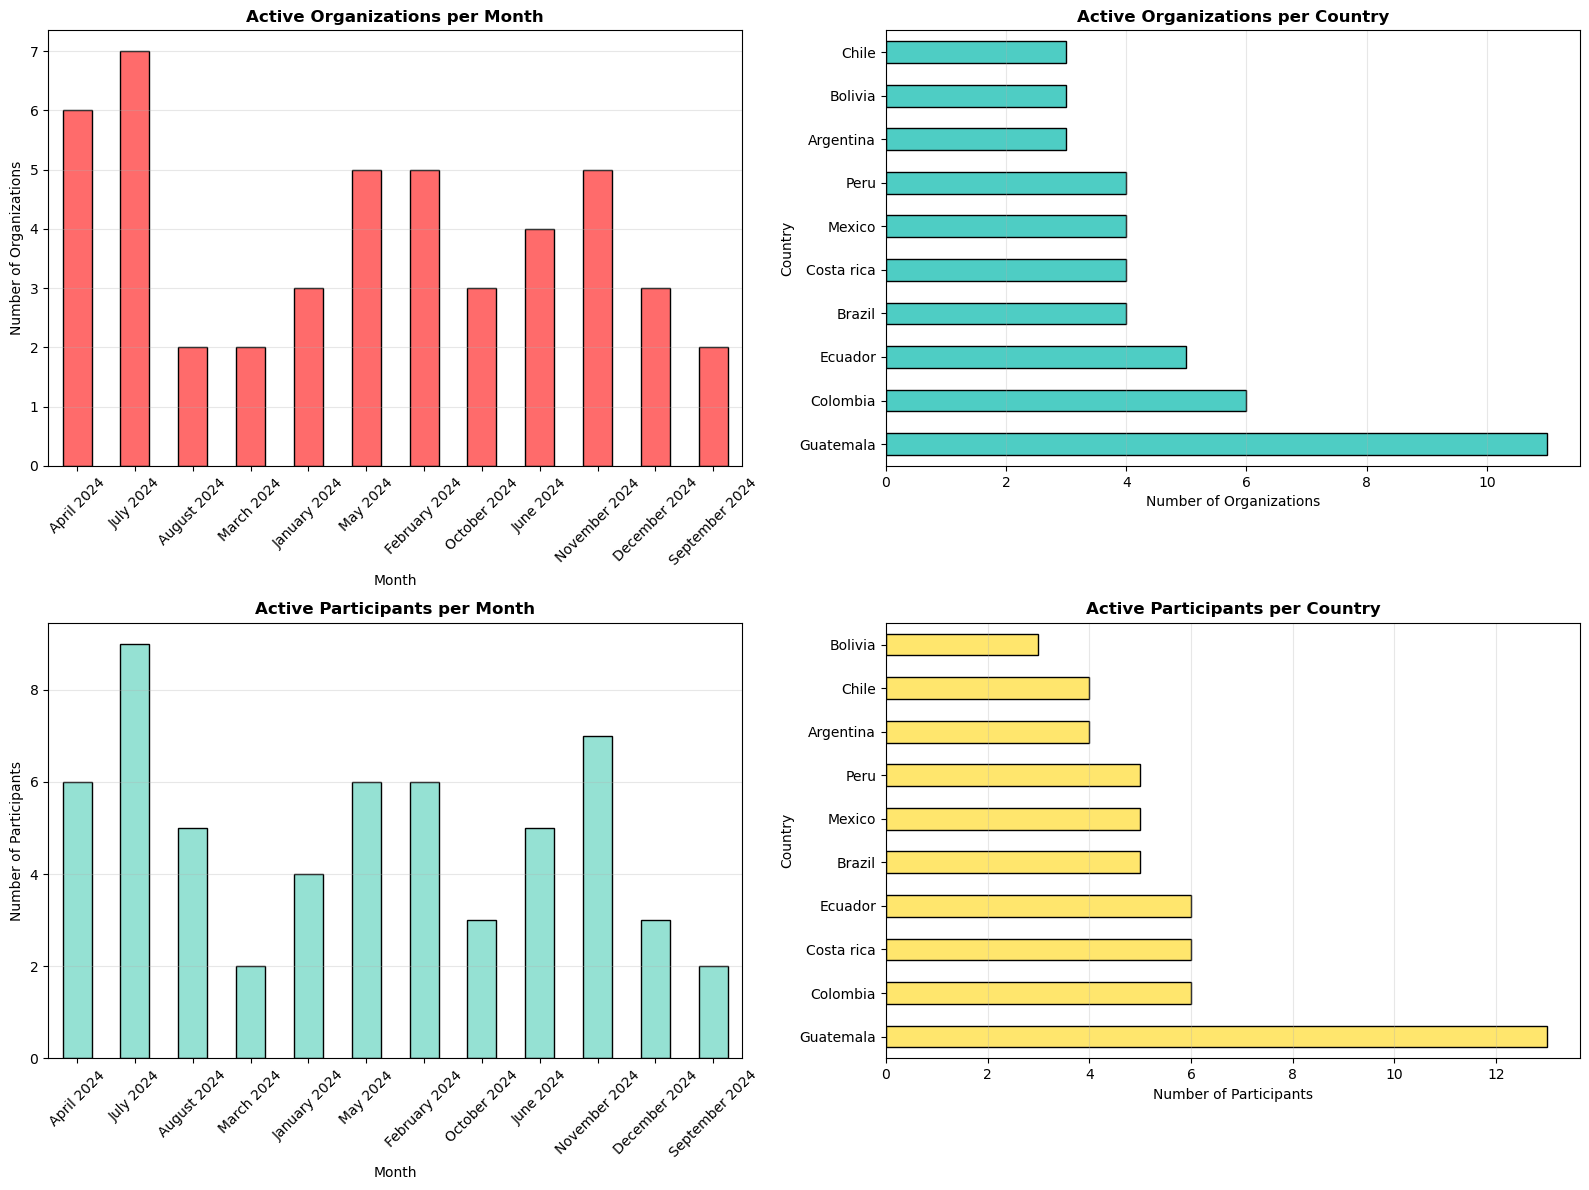

✓ Visualization saved: eda_active_organizations_participants.png


In [14]:
# Now, letś put together averything

# First lets import visualizations library:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Active Organizations per Month
ax1 = axes[0, 0]
orgs_per_month.astype(int).plot(kind='bar', ax=ax1, color='#FF6B6B', edgecolor='black')
ax1.set_title('Active Organizations per Month', fontsize=12, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Organizations')
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Active Organizations per Country
ax2 = axes[0, 1]
orgs_per_country.plot(kind='barh', ax=ax2, color='#4ECDC4', edgecolor='black')
ax2.set_title('Active Organizations per Country', fontsize=12, fontweight='bold')
ax2.set_xlabel('Number of Organizations')
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Active Participants per Month
ax3 = axes[1, 0]
participants_per_month.astype(int).plot(kind='bar', ax=ax3, color='#95E1D3', edgecolor='black')
ax3.set_title('Active Participants per Month', fontsize=12, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Participants')
ax3.grid(axis='y', alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Active Participants per Country
ax4 = axes[1, 1]
participants_per_country.plot(kind='barh', ax=ax4, color='#FFE66D', edgecolor='black')
ax4.set_title('Active Participants per Country', fontsize=12, fontweight='bold')
ax4.set_xlabel('Number of Participants')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('eda_active_organizations_participants.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: eda_active_organizations_participants.png")

/tmp/ipykernel_3132478/4249640034.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot_participants.index[pd.to_datetime(pivot_participants.index).argsort()]


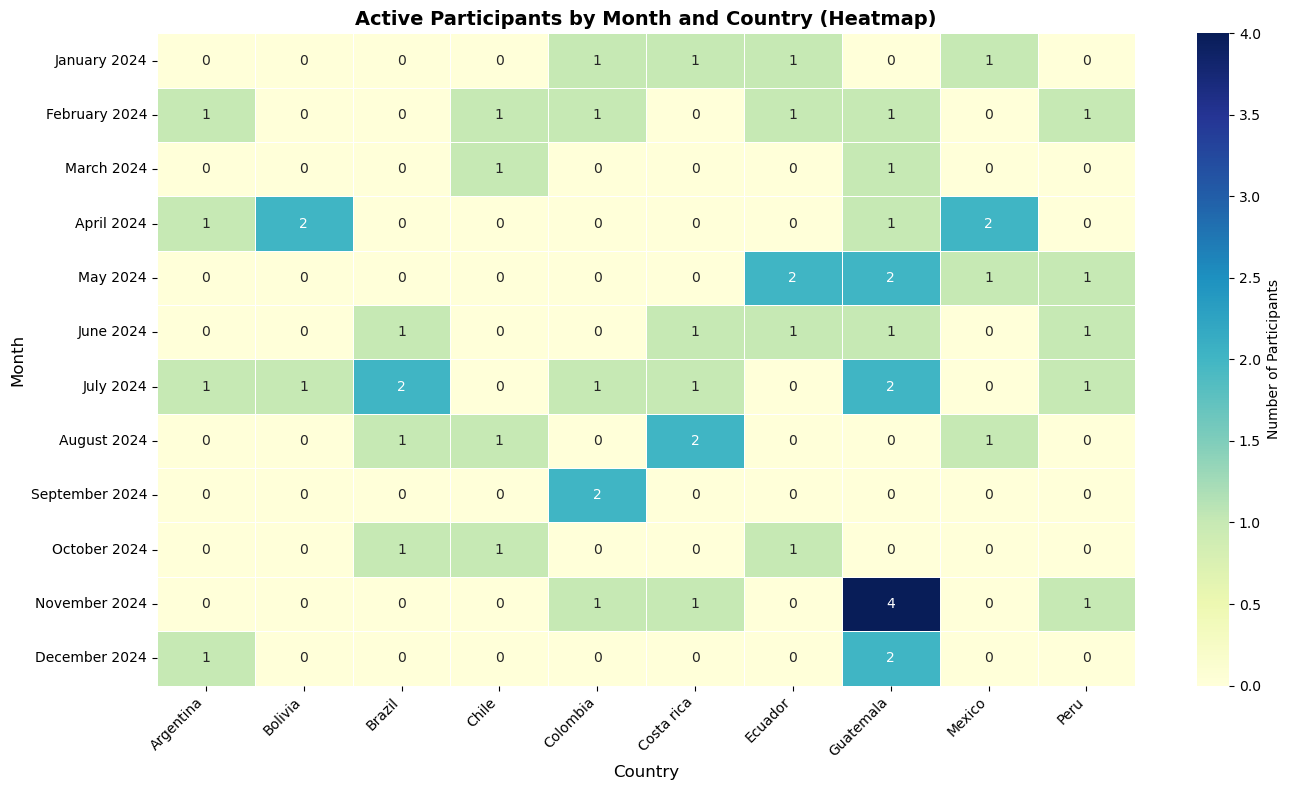

In [15]:
# And letś end this visualizations with a heat map where we can observe the months and active number of participants per country:

pivot_participants = pd.crosstab(
    df_active['Attendance_Month'], 
    df_active['Country'], 
    values=df_active['Participant_ID'], 
    aggfunc='nunique'
).fillna(0)

# Sort months chronologically
pivot_participants = pivot_participants.reindex(
    pivot_participants.index[pd.to_datetime(pivot_participants.index).argsort()]
)

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(pivot_participants.astype(int), annot=True, fmt='d', cmap='YlGnBu', 
            cbar_kws={'label': 'Number of Participants'}, ax=ax, linewidths=0.5)
ax.set_title('Active Participants by Month and Country (Heatmap)', fontsize=14, fontweight='bold')
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('eda_participants_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### Conversion analysis

In [16]:
# Letś create a dataframe that help us analyze the conversion:

# First lets see the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Organization_ID      200 non-null    object        
 1   Organization_Name    200 non-null    object        
 2   Organization_Type    200 non-null    object        
 3   Country              200 non-null    object        
 4   Campaign_ID          200 non-null    object        
 5   Campaign_Name        200 non-null    object        
 6   Campaign_Type        200 non-null    object        
 7   Campaign_Start_Date  191 non-null    datetime64[ns]
 8   Campaign_End_Date    197 non-null    object        
 9   Participant_ID       200 non-null    object        
 10  Participant_Name     200 non-null    object        
 11  Registered           200 non-null    object        
 12  Attended             200 non-null    object        
 13  Registration_Date    195 non-null  

In [20]:
# Lets create a dictionary so then can use it to create a df:

campaign_conversion = []
for campaign_id in df['Campaign_ID'].unique():
    campaign_data = df[df['Campaign_ID'] == campaign_id]
    campaign_name = campaign_data['Campaign_Name'].iloc[0]
    
    # Registared
    registered = campaign_data['Participant_ID'].nunique()
    
    #Attended
    attended = campaign_data[campaign_data['Attendance_Date'].notna()]['Participant_ID'].nunique()
    #calculating the conversion rate
    conversion_rate = (attended / registered) * 100 if registered > 0 else 0
    
    campaign_conversion.append({
        'Campaign_ID': campaign_id,
        'Campaign_Name': campaign_name,
        'Registered': registered,
        'Attended': attended,
        'Conversion_Rate_%': round(conversion_rate, 2)
    })

In [21]:
campaign_conversion

[{'Campaign_ID': 'CAM004',
  'Campaign_Name': 'Nonprofit Tech Clinic',
  'Registered': 11,
  'Attended': 4,
  'Conversion_Rate_%': 36.36},
 {'Campaign_ID': 'CAM013',
  'Campaign_Name': 'AI for Social Impact',
  'Registered': 8,
  'Attended': 3,
  'Conversion_Rate_%': 37.5},
 {'Campaign_ID': 'CAM011',
  'Campaign_Name': 'STEAM Teachers Workshop',
  'Registered': 5,
  'Attended': 0,
  'Conversion_Rate_%': 0.0},
 {'Campaign_ID': 'CAM005',
  'Campaign_Name': 'Climate Innovation Hub',
  'Registered': 10,
  'Attended': 3,
  'Conversion_Rate_%': 30.0},
 {'Campaign_ID': 'CAM010',
  'Campaign_Name': 'Nonprofit Tech Clinic',
  'Registered': 11,
  'Attended': 5,
  'Conversion_Rate_%': 45.45},
 {'Campaign_ID': 'CAM007',
  'Campaign_Name': 'Nonprofit Tech Clinic',
  'Registered': 10,
  'Attended': 2,
  'Conversion_Rate_%': 20.0},
 {'Campaign_ID': 'CAM014',
  'Campaign_Name': 'Climate Innovation Hub',
  'Registered': 8,
  'Attended': 2,
  'Conversion_Rate_%': 25.0},
 {'Campaign_ID': 'CAM018',
  'Cam

In [19]:
# creating the dataframe

conversion_df = pd.DataFrame(campaign_conversion).sort_values('Conversion_Rate_%', ascending=False)

conversion_df.head(10)

,Campaign_ID,Campaign_Name,Registered,Attended,Conversion_Rate_%
21,CAM016,Digital Inclusion Bootcamp,4,3,75.00
24,CAM012,Climate Innovation Hub,7,4,57.14
8,CAM019,Nonprofit Tech Clinic,8,4,50.00
22,CAM001,Community Fundraising Gala,4,2,50.00
4,CAM010,Nonprofit Tech Clinic,11,5,45.45
17,CAM015,LatAm Data Summit,7,3,42.86
12,CAM020,LatAm Data Summit,10,4,40.00
9,CAM006,Impact Measurement 101,8,3,37.50
1,CAM013,AI for Social Impact,8,3,37.50
0,CAM004,Nonprofit Tech Clinic,11,4,36.36


In [25]:
### Conversion rate statistics:

print(f"Average conversion rate: {conversion_df['Conversion_Rate_%'].mean():.2f}%")
print(f"Median conversion rate: {conversion_df['Conversion_Rate_%'].median():.2f}%")
print(f"Highest conversion: {conversion_df['Conversion_Rate_%'].max():.2f}%")
print(f"Lowest conversion: {conversion_df['Conversion_Rate_%'].min():.2f}%")
print(f"Std deviation: {conversion_df['Conversion_Rate_%'].std():.2f}%")

print(f"\nCampaigns with 0% conversion: {len(conversion_df[conversion_df['Conversion_Rate_%'] == 0])}")
print(f"Campaigns with high conversion (>50%): {len(conversion_df[conversion_df['Conversion_Rate_%'] > 50])}")
print(f"Campaigns with medium conversion (25-50%): {len(conversion_df[(conversion_df['Conversion_Rate_%'] >= 25) & (conversion_df['Conversion_Rate_%'] <= 50)])}")
print(f"Campaigns with low conversion (<25%): {len(conversion_df[conversion_df['Conversion_Rate_%'] < 25])}")

Average conversion rate: 29.79%
Median conversion rate: 28.57%
Highest conversion: 75.00%
Lowest conversion: 0.00%
Std deviation: 18.36%

Campaigns with 0% conversion: 3
Campaigns with high conversion (>50%): 2
Campaigns with medium conversion (25-50%): 14
Campaigns with low conversion (<25%): 9


### Visualizations for conversion rates:

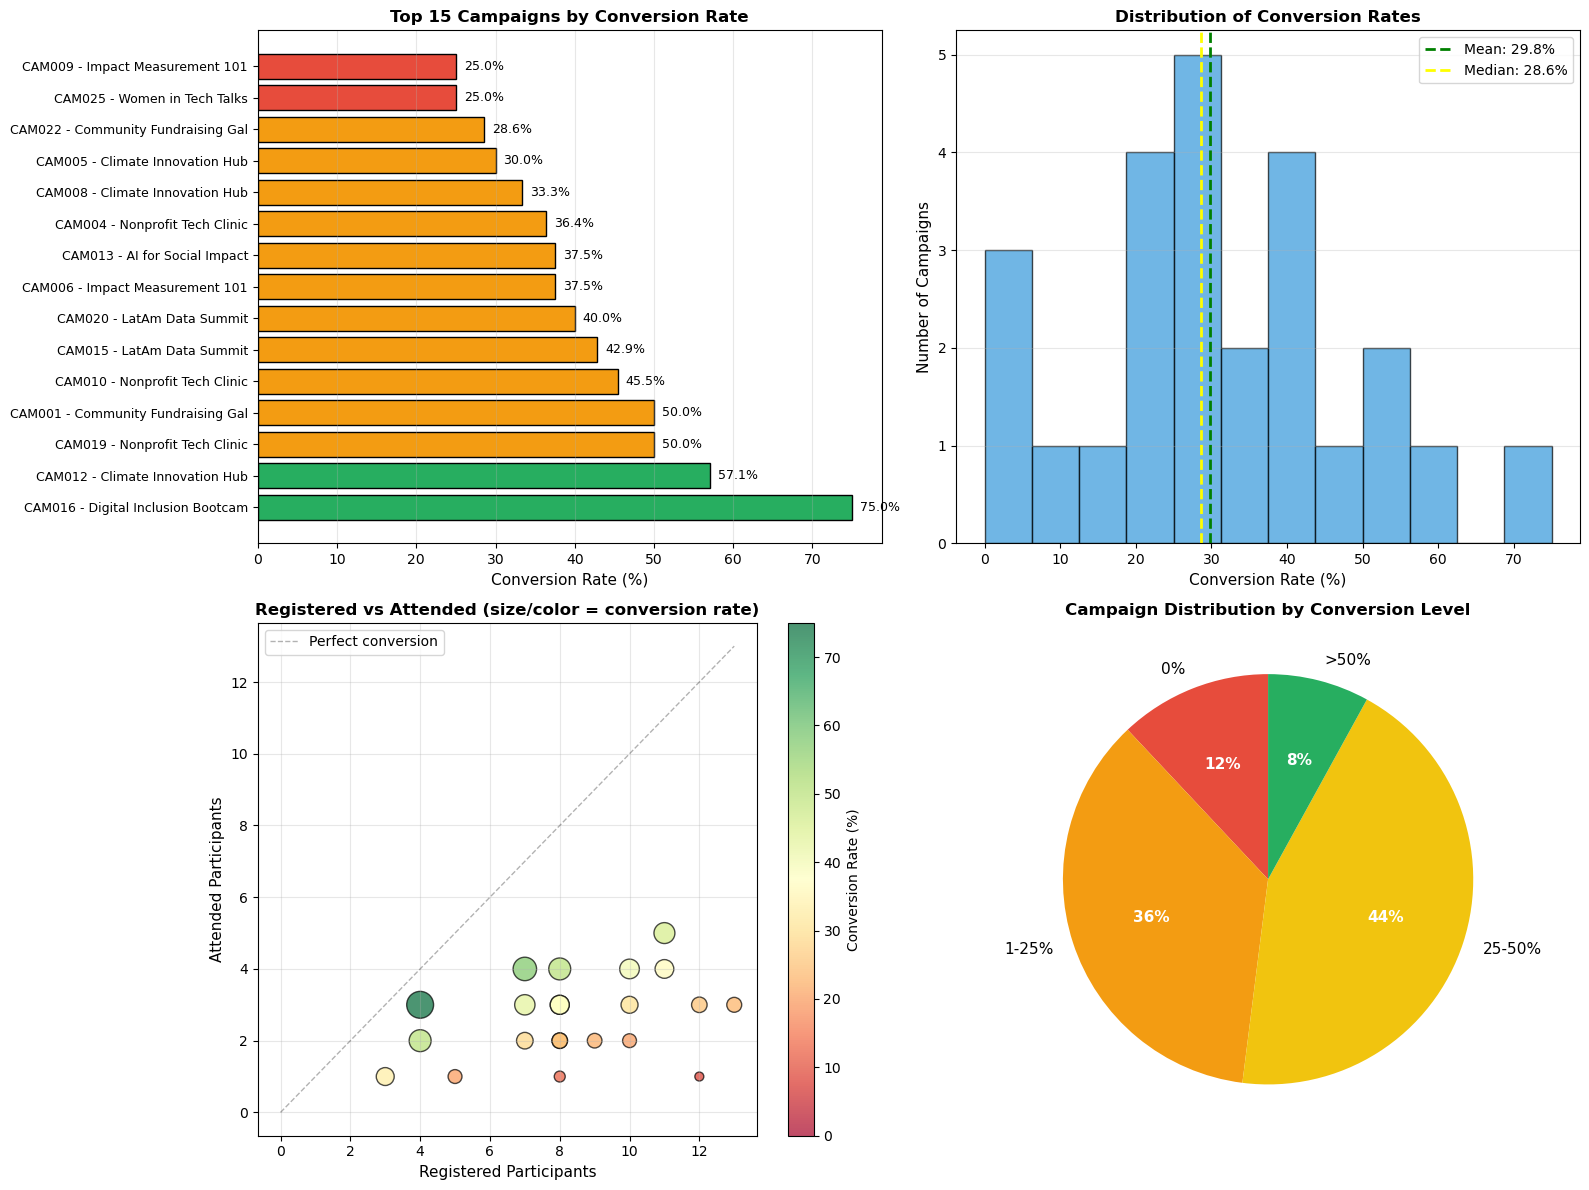

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 campaigns by conversion rate (bar chart)
ax1 = axes[0, 0]
top_15 = conversion_df.head(15)
colors_conv = ['#27AE60' if x > 50 else '#F39C12' if x > 25 else '#E74C3C' for x in top_15['Conversion_Rate_%']]
ax1.barh(range(len(top_15)), top_15['Conversion_Rate_%'], color=colors_conv, edgecolor='black')
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels([f"{row['Campaign_ID']} - {row['Campaign_Name'][:25]}" for _, row in top_15.iterrows()], fontsize=9)
ax1.set_xlabel('Conversion Rate (%)', fontsize=11)
ax1.set_title('Top 15 Campaigns by Conversion Rate', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, (_, row) in enumerate(top_15.iterrows()):
    ax1.text(row['Conversion_Rate_%'] + 1, i, f"{row['Conversion_Rate_%']:.1f}%", va='center', fontsize=9)

# Plot 2: Conversion distribution (histogram)
ax2 = axes[0, 1]
ax2.hist(conversion_df['Conversion_Rate_%'], bins=12, color='#3498DB', edgecolor='black', alpha=0.7)
ax2.axvline(conversion_df['Conversion_Rate_%'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {conversion_df["Conversion_Rate_%"].mean():.1f}%')
ax2.axvline(conversion_df['Conversion_Rate_%'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Median: {conversion_df["Conversion_Rate_%"].median():.1f}%')
ax2.set_xlabel('Conversion Rate (%)', fontsize=11)
ax2.set_ylabel('Number of Campaigns', fontsize=11)
ax2.set_title('Distribution of Conversion Rates', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Registered vs Attended (scatter plot)
ax3 = axes[1, 0]
scatter = ax3.scatter(conversion_df['Registered'], conversion_df['Attended'], 
                     s=conversion_df['Conversion_Rate_%']*5, 
                     c=conversion_df['Conversion_Rate_%'], 
                     cmap='RdYlGn', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Registered Participants', fontsize=11)
ax3.set_ylabel('Attended Participants', fontsize=11)
ax3.set_title('Registered vs Attended (size/color = conversion rate)', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Conversion Rate (%)', fontsize=10)

# Add diagonal reference line (perfect conversion)
max_val = max(conversion_df['Registered'].max(), conversion_df['Attended'].max())
ax3.plot([0, max_val], [0, max_val], 'k--', alpha=0.3, linewidth=1, label='Perfect conversion')
ax3.legend()

# Plot 4: Campaign count by conversion brackets
ax4 = axes[1, 1]
brackets = ['0%', '1-25%', '25-50%', '>50%']
counts = [
    len(conversion_df[conversion_df['Conversion_Rate_%'] == 0]),
    len(conversion_df[(conversion_df['Conversion_Rate_%'] > 0) & (conversion_df['Conversion_Rate_%'] <= 25)]),
    len(conversion_df[(conversion_df['Conversion_Rate_%'] > 25) & (conversion_df['Conversion_Rate_%'] <= 50)]),
    len(conversion_df[conversion_df['Conversion_Rate_%'] > 50])
]
colors_brackets = ['#E74C3C', '#F39C12', '#F1C40F', '#27AE60']
wedges, texts, autotexts = ax4.pie(counts, labels=brackets, autopct='%1.0f%%', colors=colors_brackets, 
                                     startangle=90, textprops={'fontsize': 11})
ax4.set_title('Campaign Distribution by Conversion Level', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('campaign_conversion_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# 3. Summary

## 4. Key insights

-  On the heatmap we can see the unique particioants per month and country, showing us that Guatemala leads with a total of 13 unique particioants, but the best Month was July for both organizations and participants.
-  Attendance or participation is in 30.5% 
-  The highest conversion rate campaigns are Digital inclusion Bootcamp (75%), Climate Innovation hub (57.1%)
-  Only 8% of the campaings get a 50% + conversion rate 
-  The average convertion rate is only 29.8% 
-  The top 5 Contries by participation are: Gutemala, Colombia, Costa Rica, Ecuadro and Brazil 
  

# 5. Exporting data cleaned:

In [30]:
df_export = df.copy()

# Convert boolean columns to string for better compatibility with BI tools
df_export['Registered'] = df_export['Registered'].astype(str)
df_export['Attended'] = df_export['Attended'].astype(str)


In [31]:
# 1. Excel format
print("Exporting to Excel (.xlsx)...")
excel_path = 'propel_cleaned_data.xlsx'
df_export.to_excel(excel_path, index=False, sheet_name='Data')
print(f"Saved: {excel_path}")
print(f"File size: {__import__('os').path.getsize(excel_path) / 1024:.1f} KB")

# 2. CSV format
print("Exporting to CSV (.csv)...")
csv_path = 'propel_cleaned_data.csv'
df_export.to_csv(csv_path, index=False)
print(f"Saved: {csv_path}")
print(f"File size: {__import__('os').path.getsize(csv_path) / 1024:.1f} KB")

Exporting to Excel (.xlsx)...
Saved: propel_cleaned_data.xlsx
File size: 22.2 KB
Exporting to CSV (.csv)...
Saved: propel_cleaned_data.csv
File size: 34.1 KB
